In [1]:
import seaborn
import pandas
import numpy

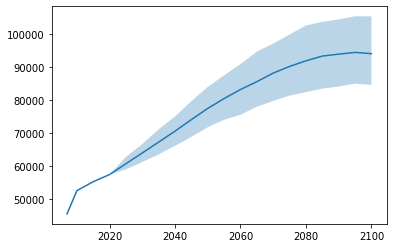

In [2]:
data = pandas.read_excel("example_Ref Emissions.xlsx", nrows=400, usecols="E:X")
tidy_data = pandas.melt(data, var_name="year", value_name="co2")
tidy_data['year'] =  pandas.to_datetime(tidy_data['year'])
percentiles = tidy_data.groupby(["year"]).describe(percentiles=[.05, .5, .95])
axis = seaborn.lineplot(data=percentiles["co2"]["50%"])
axis.fill_between(percentiles.index, percentiles[('co2', '5%')], percentiles[('co2', '95%')], alpha=0.3)

<AxesSubplot:xlabel='year', ylabel='co2'>

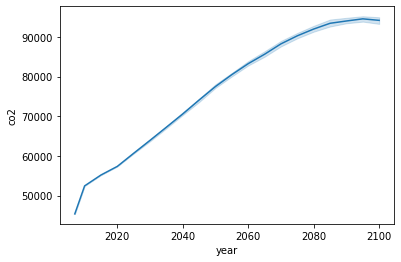

In [16]:
seaborn.lineplot(data=tidy_data, x="year", y="co2", estimator=numpy.median)

In [56]:
plot.savefig("test.png")

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Year')

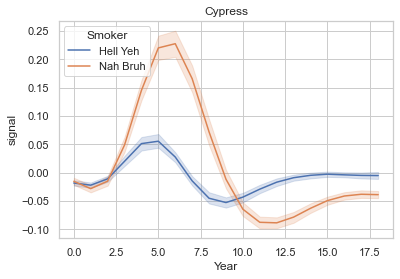

In [98]:
seaborn.lineplot(x="timepoint", y="signal",
             ci=70,
             data=cue_data)
seaborn.lineplot(x="timepoint", y="signal",
             ci=70,
             data=stim_data)
plot.legend(title="Smoker", loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plot.title("Cypress")
plot.xlabel("Year")

datetime.date(2100, 1, 1)